In [1]:
from functions import *
import matplotlib.pyplot as plt
import pickle
from parameters_eigen import *

Reproduce fig. 2b

/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


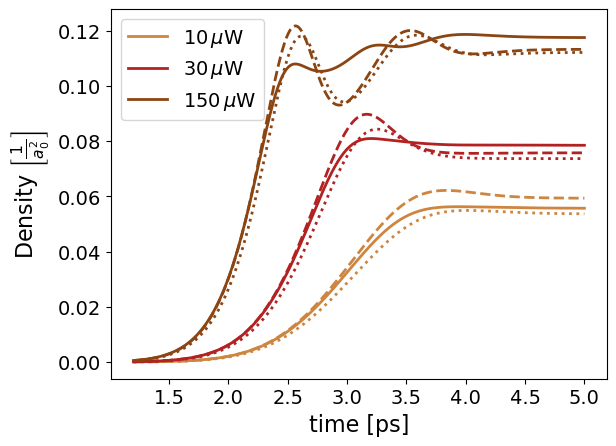

In [76]:
from parameters_general import bohr_radius
#crop data to pulse region
start = 12000
end = 50000
tlist_cropped = tlist[start:end]
z_2s = []

colors = ['peru', 'firebrick', 'saddlebrown']
for i, W in enumerate([10, 30, 150]):   
    with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells1_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
        W1RF = pickle.load(input_file)[0][start:end] 
    plt.plot(tlist_cropped/1000, W1RF*bohr_radius**2, '--', color = colors[i], linewidth = 2)
    with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500012.0_reflectionsTrue_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
        W10RT_012 = pickle.load(input_file)
    W10RT_012_avg = sum(W10RT_012)/10
    plt.plot(tlist_cropped/1000, W10RT_012_avg[start:end]*bohr_radius**2, '-',label = '{}'.format(W) + r'$\,\mu$W', color = colors[i], linewidth = 2)
    with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500012.0_reflectionsFalse_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
        W10RF_012 = pickle.load(input_file)
    W10RF_012_avg = sum(W10RF_012)/10
    plt.plot(tlist_cropped/1000, W10RF_012_avg[start:end]*bohr_radius**2, linestyle = 'dotted', color = colors[i], linewidth = 2)
plt.xlabel('time [ps]', fontsize = 16)
plt.ylabel(r'Density $\left[\frac{1}{a_0^2}\right]$', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
#plt.savefig('results/eigen/10_30_150_Confinement.pdf', bbox_inches = 'tight')

/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


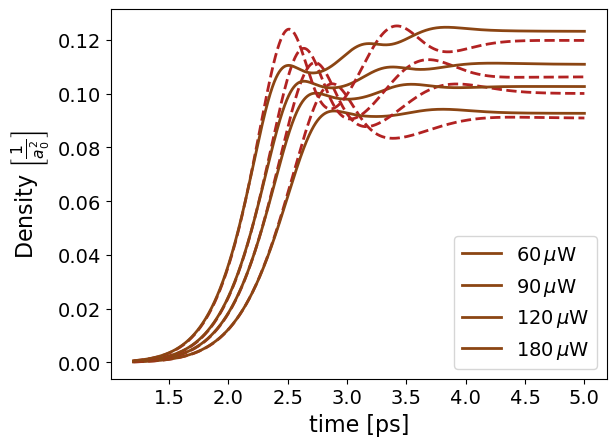

In [2]:
start = 12000
end = 50000
tlist_cropped = tlist[start:end]
z_2s = []

colors = ['peru', 'firebrick', 'saddlebrown']
for i, W in enumerate([60, 90, 120, 180]):   
    with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
        W1RF = pickle.load(input_file)[0][start:end] 
    plt.plot(tlist_cropped/1000, W1RF*bohr_radius**2, '--', color = colors[1], linewidth = 2)
    with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500012.0_reflectionsTrue_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
        W10RT_012 = pickle.load(input_file)
    W10RT_012_avg = sum(W10RT_012)/10
    plt.plot(tlist_cropped/1000, W10RT_012_avg[start:end]*bohr_radius**2, '-',label = '{}'.format(W) + r'$\,\mu$W', color = colors[2], linewidth = 2)

plt.xlabel('time [ps]', fontsize = 16)
plt.ylabel(r'Density $\left[\frac{1}{a_0^2}\right]$', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 14)
#plt.savefig('results/eigen/10_30_150_Confinement.pdf', bbox_inches = 'tight')

Next, we want to determine the Rabi frequencies at different field strengths, by measuring the time differences between the occupation maxima/minima and taking the smallest difference between two maxima/minima

/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


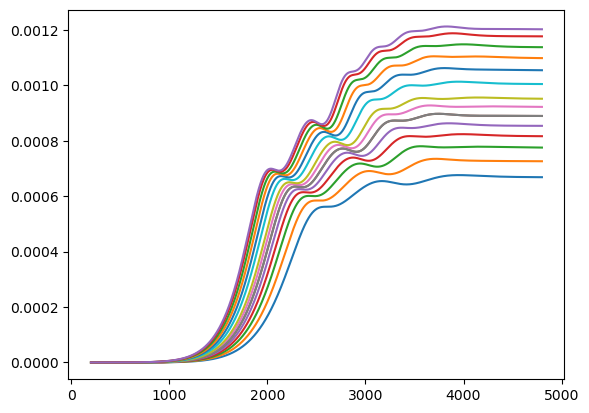

In [2]:
#read N(t) arrays for different fluences and crop to approximate pulse duration:
start = 2000
end = 48000
tlist_cropped = tlist[start:end]
occupations = []
powers = [90, 120, 150, 180, 210, 240, 270,240, 300,360,420,480,540, 600,640]#240,60, 90, 
occupations_RT = []
occupations_RT_min = []
occupations_RT_max = []
occupations_RF = []
occupations_SW = []
for W in powers:
    with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
        W1RF = pickle.load(input_file)[0]
    occupations_SW.append(np.array(W1RF[start:end]))
    with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
        W10RF = pickle.load(input_file)
    W10RF_avg = sum(W10RF)/10 
    occupations_RF.append(np.array(W10RF_avg[start:end]))
    with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500012.0_reflectionsTrue_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
        W10RT = pickle.load(input_file)
    W10RT_avg = sum(W10RT)/10
    occupations_RT.append(np.array(W10RT_avg[start:end]))
    with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500111.0_reflectionsTrue_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
        W10RT_min = pickle.load(input_file)
    W10RT_avg_min = sum(W10RT_min)/10
    occupations_RT_min.append(np.array(W10RT_avg_min[start:end]))
    with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500045.0_reflectionsTrue_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
        W10RT_max = pickle.load(input_file)
    W10RT_avg_max = sum(W10RT_max)/10
    occupations_RT_max.append(np.array(W10RT_avg_max[start:end]))

for occupation in occupations_RT_max:
    plt.plot(tlist_cropped, occupation)
    

/usr/local/python3/lib/python3.10/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


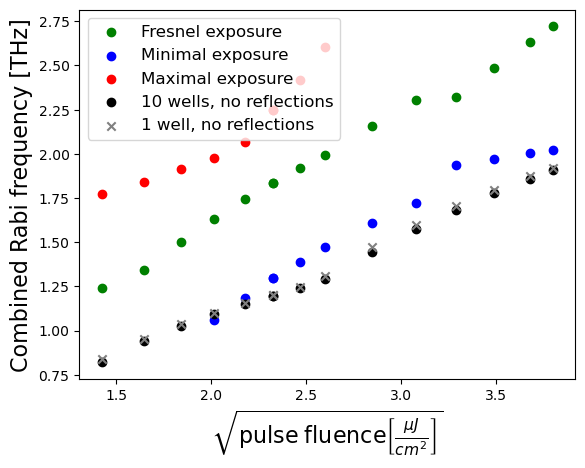

In [9]:
from copy import deepcopy
from scipy.signal import find_peaks
# find rabi frequencies from single shortest oscillation
rabi_frequencies_RF = np.zeros(len(powers))
rabi_frequencies_RT = np.zeros(len(powers))
rabi_frequencies_RT_min = np.zeros(len(powers))
rabi_frequencies_RT_max = np.zeros(len(powers))
rabi_frequencies_SW = np.zeros(len(powers))
fluences = np.array([0.1502*power*0.15 for power in powers])
for i in range(len(powers)):
    maxima, _ = find_peaks(occupations_RF[i], height=0)
    minima, _ = find_peaks(-occupations_RF[i])
    tmax_list = tlist_cropped[maxima]
    tmin_list = tlist_cropped[minima]
    diffs_maxima = np.diff(tmax_list)
    diffs_minima = np.diff(tmin_list)
    rabi_frequencies_RF[i] = 1/np.min(np.concatenate((diffs_maxima, diffs_minima)))*1e3
   # print(1/np.min(np.concatenate((diffs_maxima, diffs_minima)))*1e3)

    maxima, _ = find_peaks(occupations_RT[i], height=0)
    minima, _ = find_peaks(-occupations_RT[i])
    tmax_list = tlist_cropped[maxima]
    tmin_list = tlist_cropped[minima]
    diffs_maxima = np.diff(tmax_list)
    diffs_minima = np.diff(tmin_list)
    rabi_frequencies_RT[i] = 1/np.min(np.concatenate((diffs_maxima, diffs_minima)))*1e3

    if i > 2:
        maxima, _ = find_peaks(occupations_RT_min[i], height=0)
        minima, _ = find_peaks(-occupations_RT_min[i])
        tmax_list = tlist_cropped[maxima]
        tmin_list = tlist_cropped[minima]
        diffs_maxima = np.diff(tmax_list)
        
        diffs_minima = np.diff(tmin_list)
        #print(diffs_minima)
        #print(diffs_maxima)
        rabi_frequencies_RT_min[i] = 1/np.min(np.concatenate((diffs_maxima, diffs_minima)))*1e3

    maxima, _ = find_peaks(occupations_RT_max[i], height=0)
    minima, _ = find_peaks(-occupations_RT_max[i])
    tmax_list = tlist_cropped[maxima]
    tmin_list = tlist_cropped[minima]
    diffs_maxima = np.diff(tmax_list)
    diffs_minima = np.diff(tmin_list)
    rabi_frequencies_RT_max[i] = 1/np.min(np.concatenate((diffs_maxima, diffs_minima)))*1e3

    maxima, _ = find_peaks(occupations_SW[i], height=0)
    minima, _ = find_peaks(-occupations_SW[i])
    tmax_list = tlist_cropped[maxima]
    tmin_list = tlist_cropped[minima]
    diffs_maxima = np.diff(tmax_list)
    diffs_minima = np.diff(tmin_list)
    rabi_frequencies_SW[i] = 1/np.min(np.concatenate((diffs_maxima, diffs_minima)))*1e3

plt.scatter(np.sqrt(fluences), rabi_frequencies_RT, c = 'green', label = 'Fresnel exposure')
plt.scatter(np.sqrt(fluences)[3:], rabi_frequencies_RT_min[3:], c = 'blue', label = 'Minimal exposure')
plt.scatter(np.sqrt(fluences)[:9], rabi_frequencies_RT_max[:9], c = 'red', label = 'Maximal exposure')
plt.scatter(np.sqrt(fluences), rabi_frequencies_RF, c = 'black', label = '10 wells, no reflections')
plt.scatter(np.sqrt(fluences), rabi_frequencies_SW,marker = 'x', c = 'grey', label = '1 well, no reflections')
plt.xlabel(r"$\sqrt{\mathrm{pulse\;fluence} \left[\frac{\mu J}{cm^2}\right]}$", fontsize = 16)
plt.ylabel('Combined Rabi frequency [THz]', fontsize = 16)
plt.legend(fontsize = 12, loc = 'upper left')
plt.savefig('rabi_frequencies_confinement_full.pdf', bbox_inches = 'tight')

/usr/local/python3/lib/python3.10/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/axes/_axes.py:5484: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice


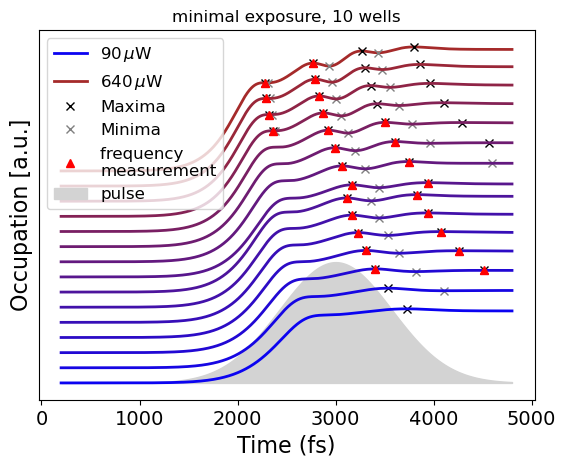

In [11]:
import matplotlib as mpl
from copy import deepcopy
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

from scipy.signal import find_peaks
occupations_list = deepcopy(occupations_RT_min)
for i in range(len(occupations_list)):
    occupations_list[i] += i*0.0001

    maxima, _ = find_peaks(occupations_list[i], height=0)
    minima, _ = find_peaks(-occupations_list[i])
    tmax_list = tlist_cropped[maxima]
    tmin_list = tlist_cropped[minima]

    if i>= 2:        
        # Calculate differences
        diffs_maxima = np.diff(tmax_list)
        diffs_minima = np.diff(tmin_list)
        
        # Determine Rabi frequency and corresponding pair
        all_diffs = np.concatenate((diffs_maxima, diffs_minima))
        all_times = np.concatenate((tmax_list[:-1], tmin_list[:-1]))
        measurement_position = np.argmin(all_diffs)
        rabi_frequency = 1 / all_diffs[measurement_position] * 1e3
        
        # Determine pair of times used for measurement
        measurement_times = (all_times[measurement_position], all_times[measurement_position] + all_diffs[measurement_position])
        
        # Plot data
        if i == 0:
            plt.plot(tlist_cropped, occupations_list[i], color = colorFader('blue','brown',(i+1)/(len(occupations_list))), label = str(powers[0]) + r'$\,\mu$W', linewidth = 2)
            plt.plot(tmin_list, occupations_list[i][minima], "x", color = 'grey', markersize=6)
            plt.plot(tmax_list, occupations_list[i][maxima], "x", color = 'black', markersize=6)
            plt.plot(measurement_times, 
                [occupations_list[i][np.argmin(np.abs(tlist_cropped - measurement_times[0]))], 
                occupations_list[i][np.argmin(np.abs(tlist_cropped - measurement_times[1]))]], 
                "^", color="red", markersize=6)
            
        elif i ==len(occupations_list)-1:
            plt.plot(tlist_cropped, occupations_list[i], color = colorFader('blue','brown',(i+1)/(len(occupations_list))), label = str(powers[-1]) + r'$\,\mu$W', linewidth = 2)
            plt.plot(tmax_list, occupations_list[i][maxima], "x", label='Maxima', color = 'black', markersize=6)
            plt.plot(tmin_list, occupations_list[i][minima], "x", label='Minima', color = 'grey', markersize=6)
            plt.plot(measurement_times, 
                [occupations_list[i][np.argmin(np.abs(tlist_cropped - measurement_times[0]))], 
                occupations_list[i][np.argmin(np.abs(tlist_cropped - measurement_times[1]))]], 
                "^", color="red", label="frequency \nmeasurement", markersize=6)
        else:
            plt.plot(tmax_list, occupations_list[i][maxima], "x", color = 'black', markersize=6)            
            plt.plot(tmin_list, occupations_list[i][minima], "x", color = 'grey', markersize=6)
            plt.plot(tlist_cropped, occupations_list[i], color = colorFader('blue','brown',(i+1)/(len(occupations_list))), linewidth = 2)
            plt.plot(measurement_times, 
                [occupations_list[i][np.argmin(np.abs(tlist_cropped - measurement_times[0]))], 
                occupations_list[i][np.argmin(np.abs(tlist_cropped - measurement_times[1]))]], 
                "^", color="red", markersize=6)
        
        # Highlight measurement pair
    else:
        plt.plot(tmax_list, occupations_list[i][maxima], "x", color = 'black', markersize=6)            
        plt.plot(tmin_list, occupations_list[i][minima], "x", color = 'grey', markersize=6)
        if i == 0:
            plt.plot(tlist_cropped, occupations_list[i], color = colorFader('blue','brown',(i+1)/(len(occupations_list))), label = str(powers[0]) + r'$\,\mu$W', linewidth = 2)
        else:plt.plot(tlist_cropped, occupations_list[i], color = colorFader('blue','brown',(i+1)/(len(occupations_list))),linewidth = 2)
plt.fill_between(tlist_cropped,gauss_pulse(tlist_cropped,np.pi*hbar/(d_cv)/1.5, sigma, t_c)**2*1000, color = 'lightgray', label= 'pulse')
plt.legend(loc = 'upper left', fontsize = 12)
plt.title(r'minimal exposure, 10 wells')
plt.xlabel('Time (fs)', fontsize = 16)
plt.ylabel('Occupation [a.u.]', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks([])
plt.savefig('rabi_measurement_RF10w_min_full', bbox_inches = 'tight')
plt.show()


#print('Rabi frequency: {:.2f} MHz'.format(rabi_frequency))
#print('Measurement position (in combined maxima/minima):', measurement_position)
#print('Measurement times:', measurement_times)


/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/python3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


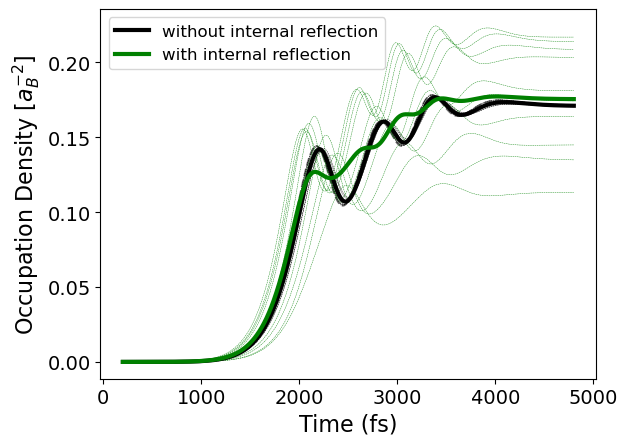

In [16]:
power = 300.0
from parameters_general import bohr_radius
with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
    W1RF = pickle.load(input_file)[0]

with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500320.0_reflectionsFalse_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
    W10RF = pickle.load(input_file)
W10RF_avg = sum(W10RF)/10 

with open('results/eigen/Qdim=700_Qmax=1.5_power{}_true_E_conversion_pf_corr=0.15_n_wells10_z2500012.0_reflectionsTrue_quadratic_grid_occupations.pickle'.format(W), 'rb') as input_file:
    W10RT = pickle.load(input_file)
W10RT_avg = sum(W10RT)/10

plt.plot(tlist_cropped, W1RF[start:end]*bohr_radius**2, '--', color = 'grey')
for i in range(len(W10RF)):
    plt.plot(tlist_cropped,W10RF[i][start:end]*bohr_radius**2,'--', color = 'black', linewidth = 0.3)
    plt.plot(tlist_cropped, W10RT[i][start:end]*bohr_radius**2,'--', color = 'green', linewidth = 0.3)
plt.plot(tlist_cropped,W10RF_avg[start:end]*bohr_radius**2, color = 'black', linewidth = 3, label = 'without internal reflection')
plt.plot(tlist_cropped, W10RT_avg[start:end]*bohr_radius**2, color = 'green', linewidth = 3, label = 'with internal reflection')
plt.legend(fontsize = 12)
plt.xlabel('Time (fs)', fontsize = 16)
plt.ylabel('Occupation Density [$a_B^{-2}$]', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig('RTvsRF_average_rabi.pdf', bbox_inches = 'tight')

In [105]:
from parameters_eigen import *
p = 10
d_cv = 0.87
t=0
[print(4*np.pi**2*hbar**2/(d_cv**2)*(0.038/10)**2 * p * np.exp(t**2/(2*sigma**2))/(n_medium/(np.sqrt(np.pi)*sigma*epsilon_0*c)*0.1503)) for p in [10,30,60,90]]

158.7882893367989
476.36486801039666
952.7297360207933
1429.09460403119


[None, None, None, None]

In [58]:

print(2*np.pi*hbar/d_cv*float(150)*0.0037)
print(E0_from_power(float(150), 0.15, sigma, gamma_rep, w_t, w_p, n_medium, True))

2.6382717303414407
0.7433986866840109


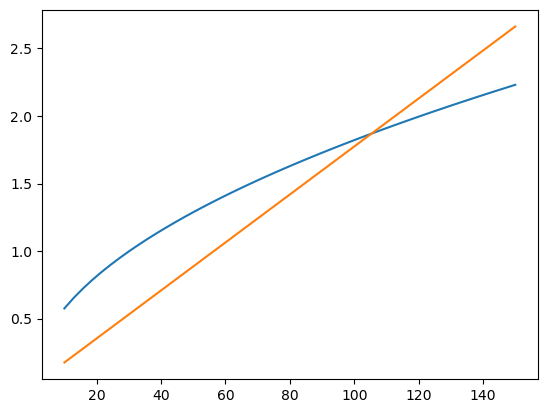

In [107]:
plt.plot(np.linspace(10,150,50),E0_from_power(np.linspace(10,150,50), 0.15, sigma, gamma_rep, w_t, w_p, n_medium, True))
plt.plot(np.linspace(10,150,50), np.linspace(0.037,0.56,50)*2*np.pi*hbar/d_cv )

In [60]:
print(2*np.pi*hbar/d_cv*0.038/10*float(150))
print(1/40*150)

2.70957637170202
3.75


In [119]:
len(W10RF)

10